In [10]:
import numpy as np
from scipy import integrate
import scipy.special as special
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#parameter
AU = 1.495978707 * 10**(11.0) #[m]
pc = AU/(np.tan((1.0/3600.0)*np.pi/180.0)) #[m]
s = (365.25*24.0*60.0*60.0)**(-1) #[yr]

#Plank collaboration ; Plank 2015 results
h_0_67 = 0.6727 #67.27+-0.66 [km/s/Mpc]  ; PLANK satellite
h_0 = 100.0*h_0_67 #[km/s/Mpc] ; current Hubble parameter
H_0 = 10**(3.0)/(s*10**6*pc)*h_0 #[1/yr]

omega_matter_0 = 0.1427 * h_0_67**(-2.0) # 0.1427h**(-2)+-0.0014
omega_lambda_0 = 0.6844 # 0.6844+-0.0091
omega_radiation_0 = 4.13 * 10**(-5) * h_0_67**(-2.0) 
omega_k_0 = 1.0 - (omega_matter_0+omega_lambda_0+omega_radiation_0)

c = 2.99792058 * 10**(8.0) #[m/s]

In [12]:
#Integrand
def integrand(z):
    integrand = 1.0/(H_0*(1.0+z)*np.sqrt(omega_matter_0*(1.0+z)**(3.0) + omega_radiation_0*(1.0+z)**(4.0) + omega_lambda_0 + omega_k_0*(1.0+z)**(2.0)))
    return integrand

In [13]:
#Integral
def integration(z1):
    result = np.zeros(len(z1))
    for i in range(len(z1)):
        integration = integrate.quad(lambda z : integrand(z),0.0,z1[i])[0]
        result[i] = integration/10**9 #[Gyr]
    return result

In [14]:
#limit
limit = integrate.quad(lambda z : integrand(z),0.0,np.inf)[0]/10**9
print(limit)

13.81246490463132


In [15]:
z1 = np.arange(0.01,3500,0.05)
#print(z1)
time = integration(z1)
print(time)

[ 0.14428903  0.83492123  1.47740501 ... 13.8124163  13.8124163
 13.81241631]


In [93]:
age = limit - time
#print(age)
age_of_universe = age[::-1]
#print(age1)
z2 = z1[::-1]
#print(z2)

[3.49996e+03 3.49991e+03 3.49986e+03 ... 1.10000e-01 6.00000e-02
 1.00000e-02]


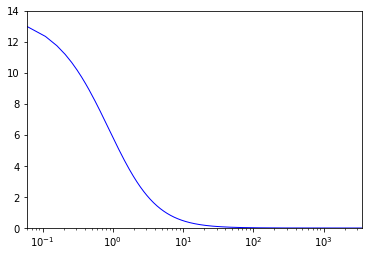

In [38]:
plt.plot(z1,age,linestyle='solid',lw=1.0,color='blue')

ax = plt.gca()
ax.set_xscale('log')

plt.xlim(0.06,3500)
plt.ylim(0,14)
plt.show()

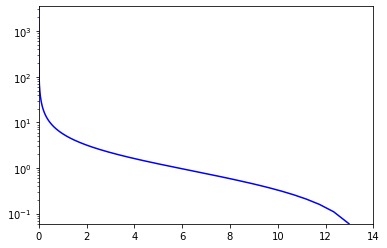

In [92]:
plt.plot(age_of_universe,z2,color='blue')
#plt.plot(age,z1,color='blue')
ax = plt.gca()
ax.set_yscale('log')

plt.ylim(0.06,3500)
plt.xlim(0,14)
plt.show()

In [104]:
def gNV(lis, num):
    idx = np.abs(np.asarray(lis) - num).argmin()
    return z2[idx]

print(gNV(age_of_universe, 0.0004))

1044.41


## フィットはダメ

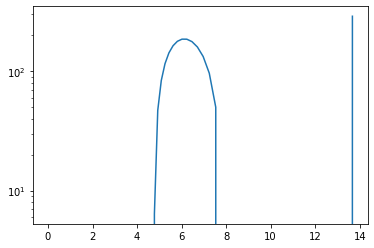

In [72]:
num = 4

x = np.array(age_of_universe)
y = np.array(z1)
coe = np.polyfit(x, y, num)
#print('多項式の係数{0}'.format(line))
#print(line[1])

age = x.tolist()
redshift = []

for i in range(len(age)):
    Z = coe[0]*age[i]**(num-1) + coe[1]*age[i]**(num-2) + coe[2]*age[i]**(num-3) + coe[3]*age[i]**(num-4)
    redshift.append(Z)

#print(redshift)

#plt.scatter(x,y)
plt.plot(age,redshift)
ax = plt.gca()
ax.set_yscale('log')
#plt.ylim(0.06,3500)
#plt.xlim(0,14)
plt.show()


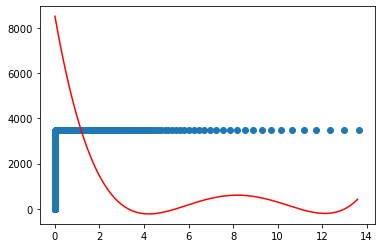

In [87]:
num = 5

x = np.array(age_of_universe)
y = np.array(z1)
coe = np.polyfit(x, y, num)

u = np.arange(0, 13.6, 0.01)
v = coe[0]*u**(num-1) + coe[1]*u**(num-2) + coe[2]*u**(num-3) + coe[3]*u**(num-4) + coe[4]*u**(num-5)
#v = coe[0]*u**(num-1) + coe[1]*u**(num-2)
plt.plot(u, v, color = 'red')
plt.scatter(x,y)
ax = plt.gca()
#ax.set_yscale('log')
#plt.ylim(0.06,3500)
#plt.xlim(0,14)
plt.show()